<font face="Times New Roman" size = 4>I want to find the mussel in one mussel reef by using SIFT algorithm.</font>

<font face="Times New Roman" size = 4>I randomly choose one picture of mussel from wikipedia and one picture about mussel reef from "Google Images". And I use the SIFT algorithm to find the feature of these two images and then match the features in those two images. I think the features of mussels in image of mussel reef is similar with the features of mussel image.</font>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

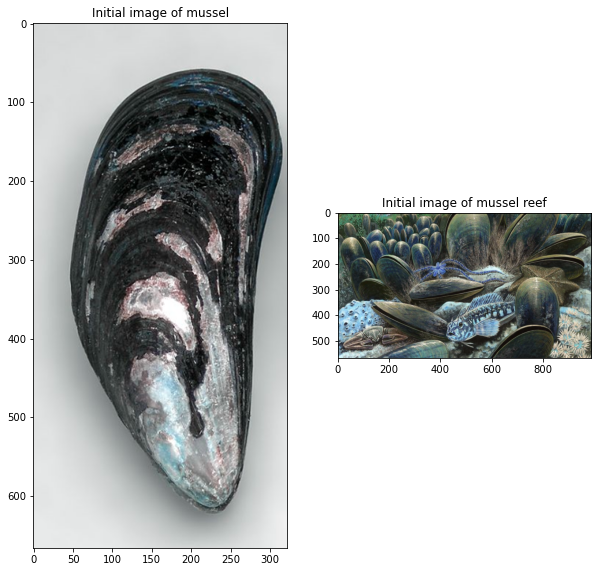

In [48]:
#Read the images
mussel = cv2.imread('mussel.png')
reef = cv2.imread('reef.png')

plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.title("Initial image of mussel")
plt.imshow(mussel)

plt.subplot(1,2,2)
plt.title("Initial image of mussel reef")
plt.imshow(reef)

#Convert the color images into gray images, which is the fundamentation of following steps
mussel_g = cv2.cvtColor(mussel, cv2.COLOR_BGR2GRAY)
reef_g = cv2.cvtColor(reef, cv2.COLOR_BGR2GRAY)


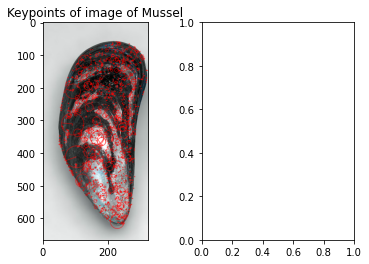

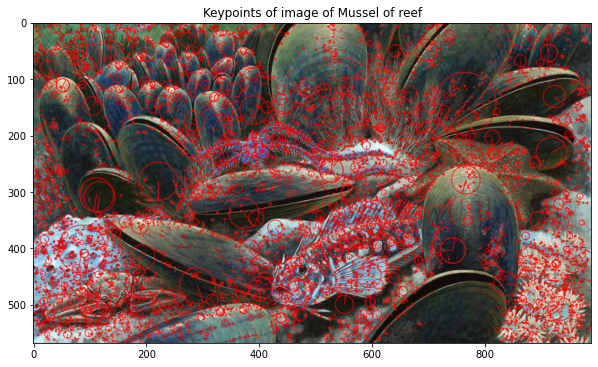

In [50]:
#Process 1: Finding features of two input images using SIFT algorithm

#Create SIFT oprator
sift = cv2.xfeatures2d.SIFT_create()

#Calculate the keypoints and descriptor in two images
key1, des1 = sift.detectAndCompute(mussel_g, None)
key2, des2 = sift.detectAndCompute(reef_g, None)

#Copy images used for drawing features
img_mussel = mussel.copy()
img_reef = reef.copy()

#Draw features
img_mussel = cv2.drawKeypoints(image=mussel, 
                               keypoints = key1,
                               outImage=img_mussel, 
                               color=(255,0,0),
                              flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

img_reef = cv2.drawKeypoints(image=reef, 
                               keypoints = key2, 
                               outImage=img_reef, 
                               color=(255,0,0),
                              flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


plt.subplot(1,2,1)
plt.imshow(img_mussel)
plt.title("Keypoints of image of Mussel")

plt.subplot(1,2,2)
plt.figure(figsize=(10,10))
plt.imshow(img_reef)
plt.title("Keypoints of image of Mussel of reef")

plt.show()

In [33]:
#Process 2: Matching the features

#Create math operator
matcher = cv2.FlannBasedMatcher()
matchPoints = matcher.match(des1, des2)

In [34]:
#Look around the main matching results
minMatch = matchPoints[0].distance
minpoint = 0
maxMatch = matchPoints[1].distance 
maxpoint = 0

for i in range(len(matchPoints)):
    if matchPoints[i].distance < minMatch:
        minpoint = i
        minMatch = matchPoints[i].distance
        
        
    if matchPoints[i].distance > maxMatch:
        maxpoint = i
        maxMatch = matchPoints[i].distance

print("第", minpoint , "个点是最佳匹配，匹配值为：",minMatch)
print("第", maxpoint , "个点是最差匹配，匹配值为：",maxMatch)

第 31 个点是最佳匹配，匹配值为： 82.51060485839844
第 1205 个点是最差匹配，匹配值为： 410.2828369140625


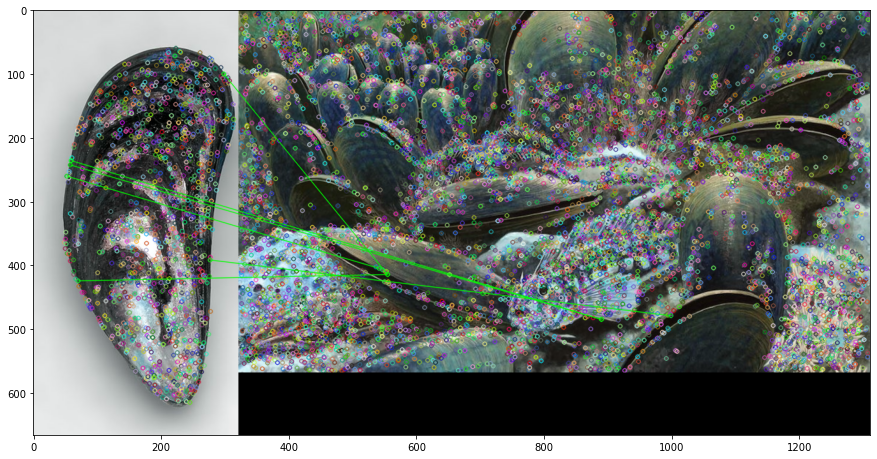

In [40]:
#Process3: Drawing the matching result
goodMatchPoints = []

#Find the most similar features:
for i in range(len(matchPoints)):
    if matchPoints[i].distance < minMatch + (maxMatch-minMatch)/20:
        goodMatchPoints.append(matchPoints[i])

outImg = None
outImg = cv2.drawMatches(mussel, key1, 
                         reef, key2, 
                         goodMatchPoints, 
                         outImg, matchColor=(0,255,0), 
                         flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)

plt.figure(figsize = (15,8))
plt.imshow(outImg)
plt.show()

<font face="Times New Roman" size = 4>The green lines means, the two end points which stand for features of the image is similar. We can know this algorithm only find little number of mussels in reef, but the accuracy of result is good.</font>